In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
df = pd.read_csv('Clean data.csv')


In [9]:
df.head()

,Unnamed: 0,Company,Salary,JobTitle,Location,Job Description,Rating,Industry,Size,Founded,...,Max_Salary,Average Salary,Job_State,Job_City,age,Python,r_Studio,Spark,aws,excel
0,0,Boston Children's Hospital,$42K - $54K (Glassdoor est.),Natural Language Processing Research Assistant II,"Boston, MA","At Boston Children’s Hospital, the quality of ...",4.0,Nonprofit Organization,5001 to 10000 Employees,1869,...,54.0,48.0,MA,Boston,154,0,0,0,0,0
1,1,Cenergy International Services,$125K (Employer est.),Senior Systems Engineer - Systems Modeling & C...,"Boston, MA",You will have an opportunity to directly impac...,4.1,Company - Public,10000+ Employees,1907,...,125.0,125.0,MA,Boston,116,0,0,0,0,0
2,3,Slim Chickens,$65K - $92K (Glassdoor est.),Senior Data Analyst - Finance,"Fayetteville, AR",Job Purpose: Use your out-of-the-box thinking ...,3.7,Restaurants & Cafes,Unknown,Company - Private,...,92.0,78.5,AR,Fayetteville,-1,0,0,0,0,0
3,5,Charter Manufacturing,$78K - $192K (Employer est.),Advance Analytics Data Scientist,"Mequon, WI",POSITION PURPOSE/MISSION:\nEffectively synthes...,4.1,Company - Private,1001 to 5000 Employees,1946,...,192.0,135.0,WI,Mequon,77,0,0,0,0,0
4,7,n-Lorem Foundation,$80K - $100K (Employer est.),Clinical Data Scientist,"Carlsbad, CA",Position Title: Clinical Data Scientist\nRepor...,-1.0,-1,-1,-1,...,100.0,90.0,CA,Carlsbad,-1,0,0,0,0,0


In [10]:
df.columns

Index(['Unnamed: 0', 'Company', 'Salary', 'JobTitle', 'Location',
       'Job Description', 'Rating', 'Industry', 'Size', 'Founded', 'Revenue',
       'hourly', 'Employer provided', 'Min_Salary', 'Max_Salary',
       'Average Salary', 'Job_State', 'Job_City', 'age', 'Python', 'r_Studio',
       'Spark', 'aws', 'excel'],
      dtype='object')

In [11]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [12]:
df['job_simplified'] = df['JobTitle'].apply(title_simplifier)

In [13]:
df.job_simplified.value_counts()

data scientist    133
na                117
analyst            55
mle                28
data engineer      11
director            1
Name: job_simplified, dtype: int64

In [14]:
df['seniority'] = df['JobTitle'].apply(seniority)
df.seniority.value_counts()

na        223
senior    116
jr          6
Name: seniority, dtype: int64

In [15]:
df.Job_State.value_counts()

 TX              49
 CA              45
 MA              40
Remote           24
 VA              21
 MD              16
 NY              15
 GA              12
 PA              12
 WA              12
 AR              11
 WI              11
 AL              11
 NJ              11
 NV               9
 DC               8
 IL               8
 NC               6
 CO               4
 OH               3
Texas             3
United States     3
 VT               2
 AZ               2
 NE               2
 FL               1
New Jersey        1
Illinois          1
 MO               1
 IN               1
Name: Job_State, dtype: int64

In [16]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      1336
1      1191
2       687
3       818
4       593
       ... 
340     879
341     672
342     296
343       2
344    1085
Name: desc_len, Length: 345, dtype: int64

In [17]:
#hourly wage to annual 

df['Min_Salary'] = df.apply(lambda x: x.Min_Salary*2 if x.hourly ==1 else x.Min_Salary, axis =1)
df['Max_Salary'] = df.apply(lambda x: x.Max_Salary*2 if x.hourly ==1 else x.Max_Salary, axis =1)

In [18]:
df[df.hourly ==1][['hourly','Min_Salary','Max_Salary']]

,hourly,Min_Salary,Max_Salary
8,1,56.00,60.00
17,1,200.00,200.00
25,1,130.00,160.00
68,1,94.00,94.00
81,1,94.00,94.00
87,1,113.48,121.54
126,1,40.00,40.00
148,1,56.00,60.00
159,1,200.00,200.00
167,1,56.00,60.00


In [19]:
df.Company.value_counts()

Black Sesame Technologies Inc                     15
Boston Children's Hospital                        11
Bluemont Technology & Research, Inc.              11
Cenergy International Services                    11
Sysdata Consulting, Inc                           11
                                                  ..
Organizational Development Resource Group, LLC     1
Axle Informatics                                   1
eJAmerica                                          1
Humbi Analytics LLC                                1
Grainger                                           1
Name: Company, Length: 87, dtype: int64

In [20]:
df.describe()

,Unnamed: 0,Rating,hourly,Employer provided,Min_Salary,Max_Salary,Average Salary,age,Python,r_Studio,Spark,aws,excel,desc_len
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.0,345.000000,345.000000,345.000000,345.000000
mean,228.646377,2.477391,0.078261,0.623188,87.114435,125.303014,101.384797,37.455072,0.060870,0.0,0.034783,0.005797,0.092754,919.249275
std,137.639304,2.236460,0.268972,0.485291,29.602781,44.504452,31.901103,54.733061,0.239438,0.0,0.183495,0.076028,0.290508,588.569775
min,0.000000,-1.000000,0.000000,0.000000,40.000000,40.000000,20.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000
25%,107.000000,-1.000000,0.000000,0.000000,70.000000,92.000000,78.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,672.000000
50%,221.000000,3.700000,0.000000,1.000000,81.000000,125.000000,102.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,813.000000
75%,348.000000,4.100000,0.000000,1.000000,96.000000,144.000000,120.000000,74.000000,0.000000,0.0,0.000000,0.000000,0.000000,1112.000000
max,479.000000,5.000000,1.000000,1.000000,200.000000,280.000000,217.500000,212.000000,1.000000,0.0,1.000000,1.000000,1.000000,7271.000000


<Axes: >

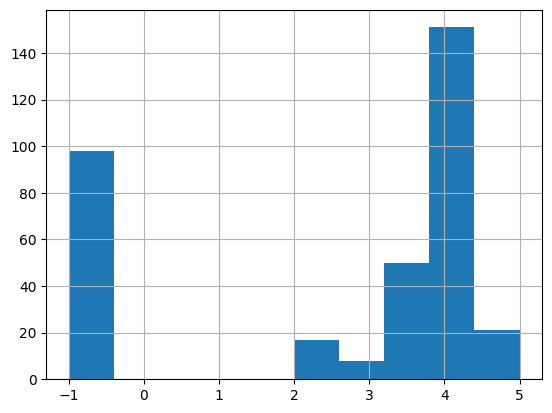

In [21]:
df.Rating.hist()

<Axes: >

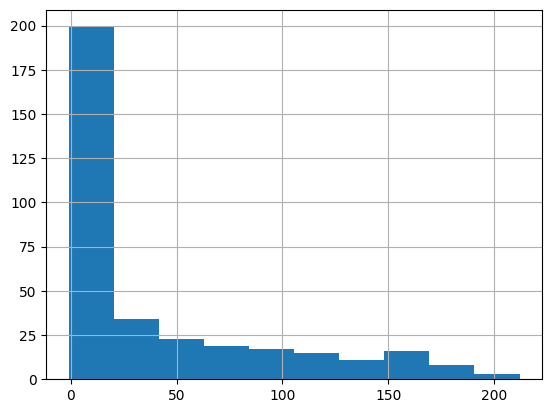

In [22]:
df.age.hist()

<Axes: >

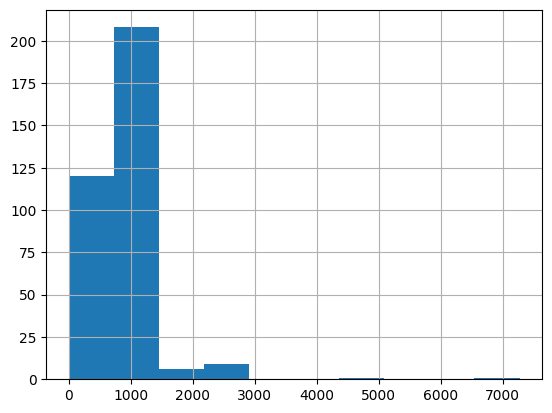

In [23]:
df.desc_len.hist()

<Axes: >

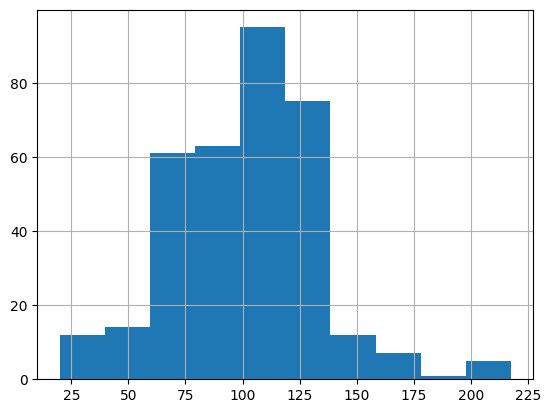

In [24]:
df['Average Salary'].hist()

<Axes: >

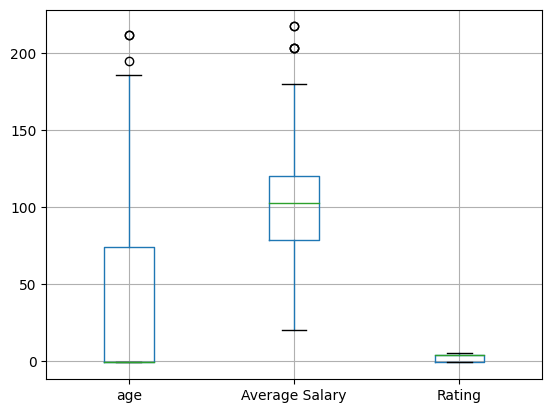

In [25]:
df.boxplot(column = ['age','Average Salary','Rating'])

<Axes: >

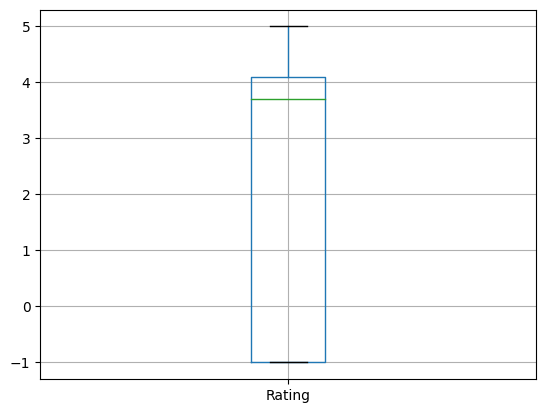

In [26]:
df.boxplot(column = 'Rating')

In [27]:
df[['age','Average Salary','Rating','desc_len']].corr()


,age,Average Salary,Rating,desc_len
age,1.000000,0.088381,0.469793,0.086480
Average Salary,0.088381,1.000000,0.108962,0.008342
Rating,0.469793,0.108962,1.000000,0.147778
desc_len,0.086480,0.008342,0.147778,1.000000


<Axes: >

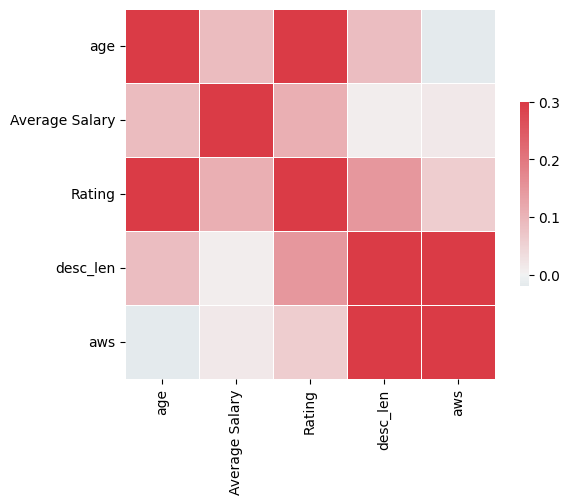

In [28]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','Average Salary','Rating','desc_len','aws']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
df_cat = df[['Location', 'Size', 'Industry', 'Revenue', 'Company', 'Job_State', 'Python', 'r_Studio',
       'Spark', 'aws', 'excel', 'job_simplified', 'seniority']]

graph for Location: total = 64


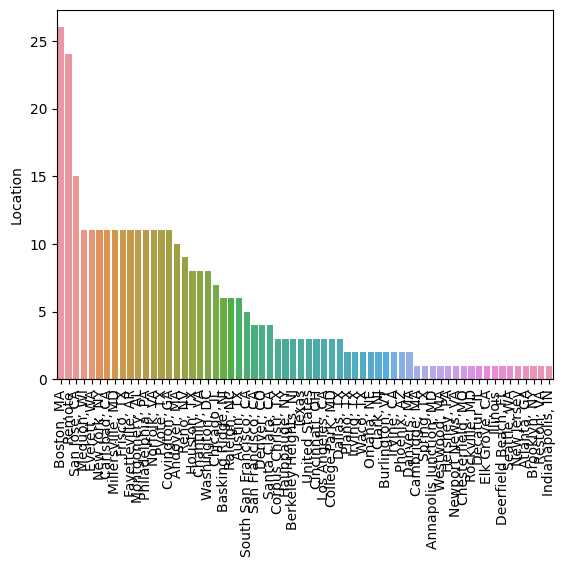

graph for Size: total = 9


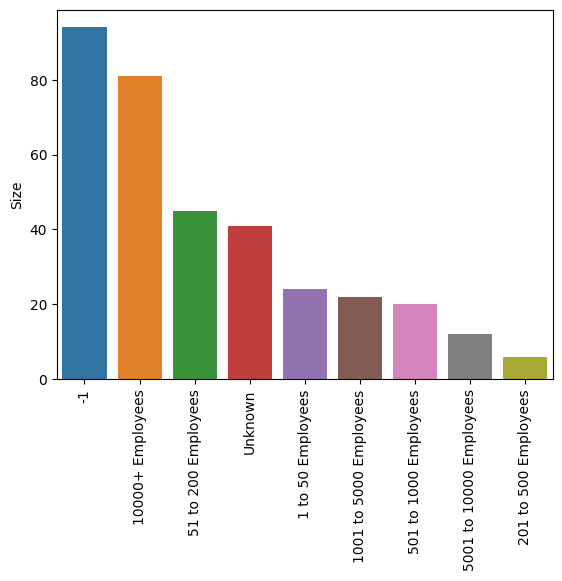

graph for Industry: total = 20


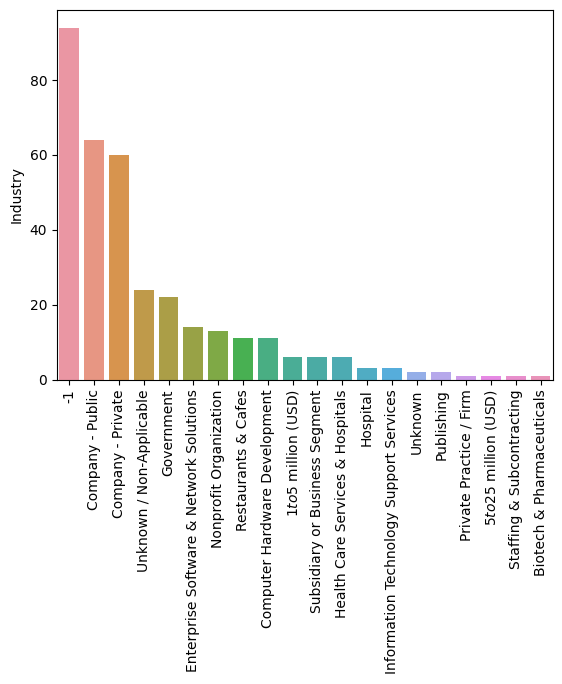

graph for Revenue: total = 9


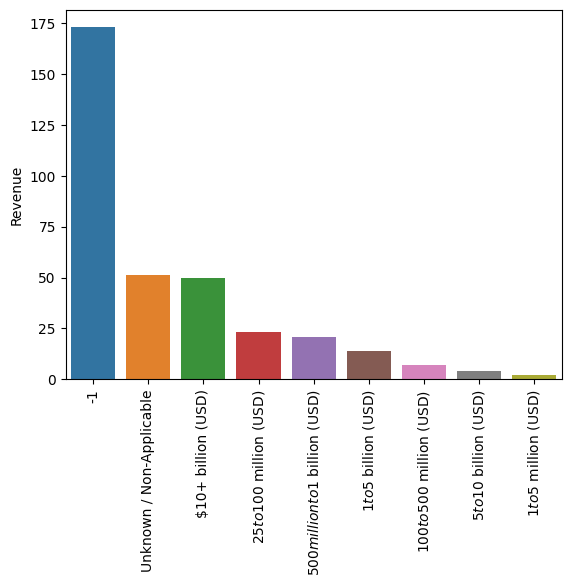

graph for Company: total = 87


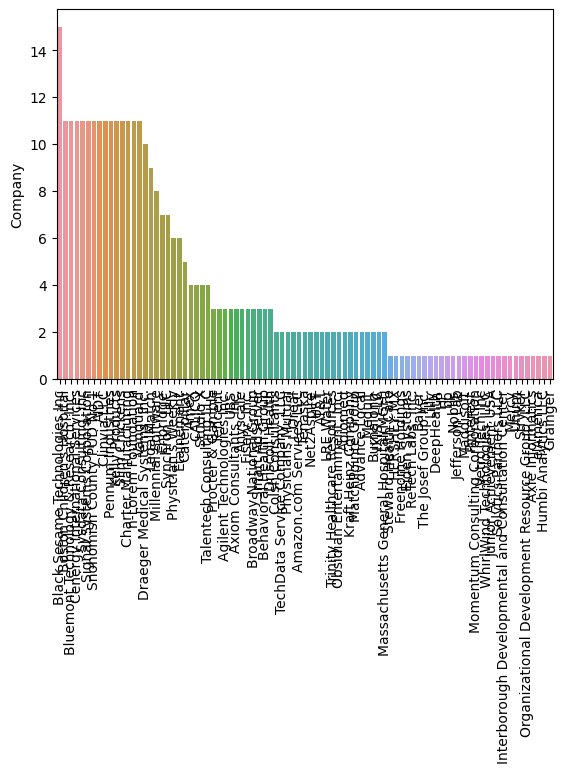

graph for Job_State: total = 30


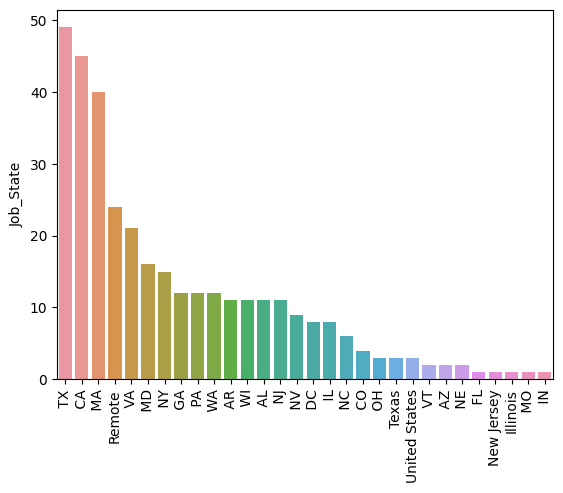

graph for Python: total = 2


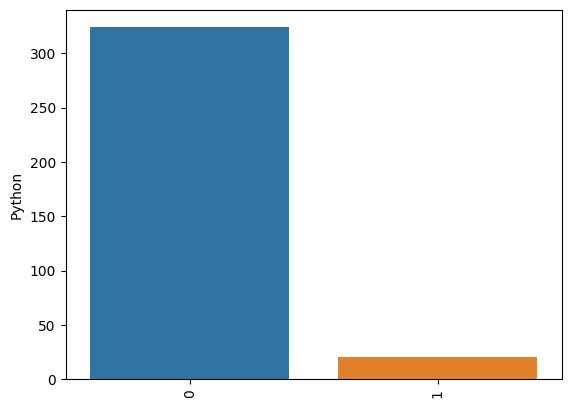

graph for r_Studio: total = 1


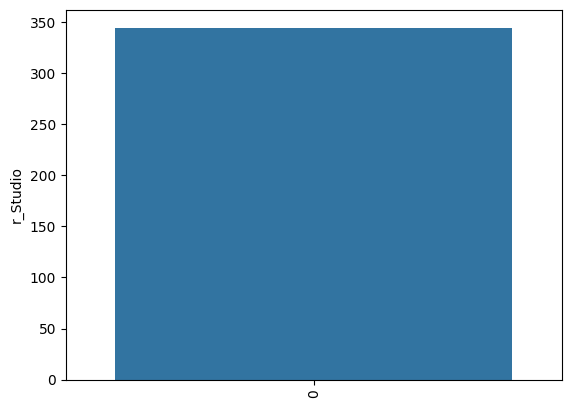

graph for Spark: total = 2


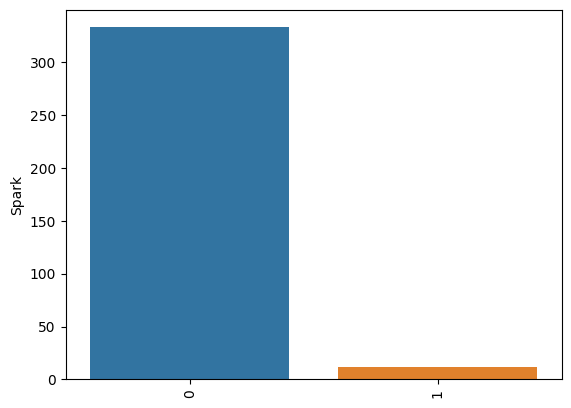

graph for aws: total = 2


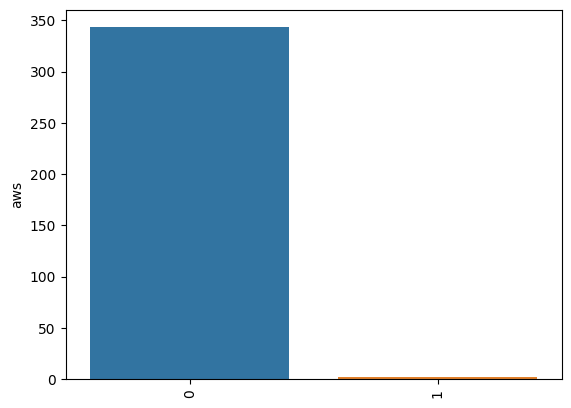

graph for excel: total = 2


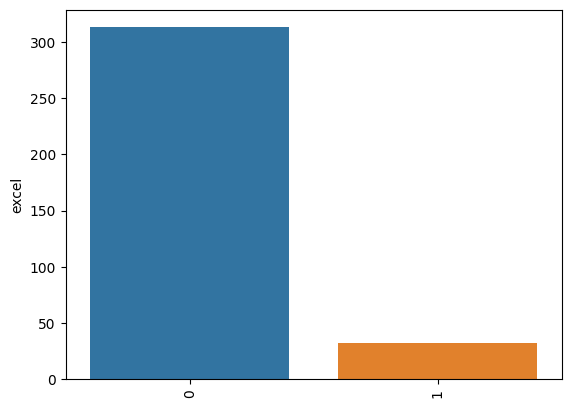

graph for job_simplified: total = 6


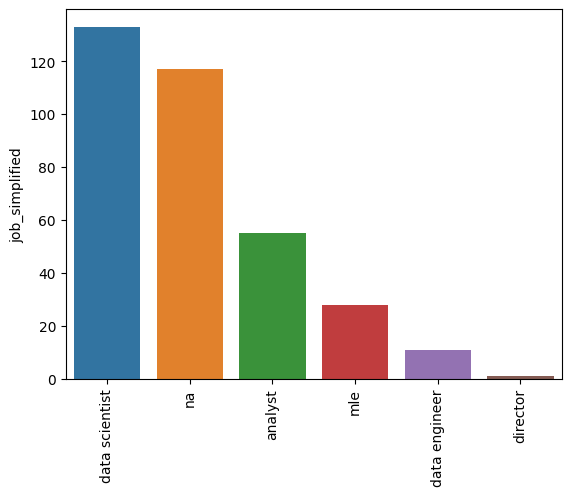

graph for seniority: total = 3


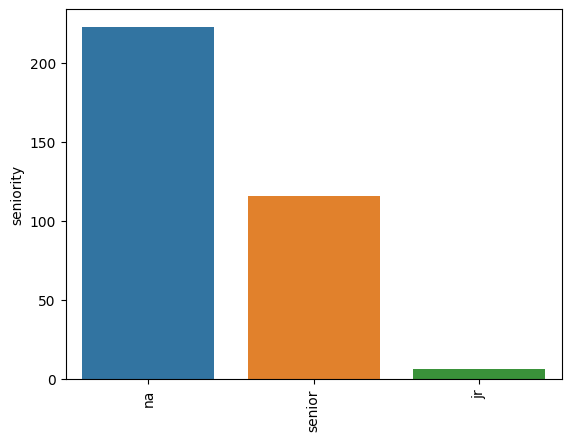

In [30]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
pd.pivot_table(df, index = 'job_simplified', values = 'Average Salary')


,Average Salary
job_simplified,
analyst,89.036364
data engineer,110.000000
data scientist,117.366579
director,120.000000
mle,128.714286
na,81.512821


In [32]:
pd.pivot_table(df, index = ['job_simplified','seniority'], values = 'Average Salary')

Average Salary
job_simplified seniority                
analyst        na             100.000000
               senior          88.622642
data engineer  na             110.000000
data scientist jr              88.750000
               na             116.029591
               senior         136.117647
director       senior         120.000000
mle            na             128.714286
na             na              62.548611
               senior         111.855556

In [33]:
pd.pivot_table(df, index = ['job_simplified','Job_State'], values = 'Average Salary').sort_values('job_simplified', ascending = True)

Average Salary
job_simplified Job_State                    
analyst         AR                 78.500000
                DC                113.000000
                FL                 72.500000
                GA                106.000000
                IL                 61.500000
                MA                 82.000000
                NC                 92.500000
                NJ                 82.500000
                NY                102.357143
                TX                 83.200000
data engineer   VA                110.000000
data scientist United States      118.500000
               Texas              175.000000
               Remote             100.500000
               New Jersey         130.000000
               Illinois            93.500000
                WI                135.000000
                WA                124.208333
                VA                140.750000
                TX                113.227273
                OH                100.000000
                VT                104.500000
                NJ                 95.700000
                NE                102.000000
                MO                 84.500000
                MD                137.000000
                MA                109.416667
                IL                110.750000
                DC                 91.500000
                CO                102.500000
                CA                111.150200
                NY                122.500000
director       Remote             120.000000
mle             PA                114.000000
                MD                129.500000
                MA                105.000000
                CA                203.500000
                IL                105.000000
na              TX                 49.500000
                AL                 73.000000
                AZ                140.000000
                CA                122.205882
                CO                 20.000000
                GA                 75.000000
                IN                 95.500000
                MA                 86.500000
                MD                 90.500000
                NV                 60.000000
                PA                 76.500000
               Remote              91.529412

In [34]:
df.to_csv('eda_data.csv')